<a href="https://www.kaggle.com/code/sushilgodiyal/heart-attack-risk-prediction-dataset?scriptVersionId=262591418" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [278]:
data=pd.read_csv('/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv')


In [279]:
data.columns
print('\nColumns:',data.columns.tolist())


Columns: ['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere', 'Heart Attack Risk']


In [280]:
print(data.head())
print('\nColumns:',data.columns.tolist())

  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

In [281]:
#print missing value 
print('\n Missing value per columns')
print(data.isnull().sum())


 Missing value per columns
Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int

In [282]:
print(data.shape)

(8763, 26)


In [283]:
# print(data.dtypes)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [284]:
# Divide columns with seperate categorial or numerical 
def separate_columns_by_dtype(data1):
    categorical_cols = [col for col in data.columns if data[col].dtype == 'object' or data[col].dtype.name == 'category']
    numerical_cols = [col for col in data.columns if data[col].dtype != 'object' and data[col].dtype.name != 'category']
    return categorical_cols, numerical_cols

# Use the function
categorical_cols, numerical_cols = separate_columns_by_dtype(data)

# Verify
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Patient ID', 'Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere']
Numerical Columns: ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk']


In [285]:
#next steps for a proper EDA (Exploratory Data Analysis) are:


In [286]:
print(data[numerical_cols].describe())

               Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313           

In [287]:
# 1. Descriptive / Summary Questions

# What is the average age of patients in the dataset?
print("1 Average Age of patients in the dataset ",data['Age'].mean())

#What is the distribution of patients by sex?
distribution=data['Sex'].value_counts()
print("2", distribution)

# Which country or continent has the highest number of patients?
        # first calculate country distribution 
country_distribution=data['Country'].value_counts()
top_count=country_distribution.max()
print(f"\n3 country {country_distribution.idxmax() } with highest number of patient: {top_count}({top_count} patents)")

# What is the average cholesterol level or heart rate among the patients?
print(f"\n4 Average Cholesterol level is {data['Cholesterol'].mean()} ")

# What proportion of patients have high blood pressure or obesity?

count1=((data['Heart Rate']>100).sum())
print(f"\nPatient Having high heart Rate more than 100 is= {count1} and obisity {(data['Obesity']).sum()}")


# How many patients smoke, consume alcohol, or have diabetes?


print(f"\n pateints smoke={(data['Smoking']).sum() } and consume alcohal ={data['Alcohol Consumption'].sum()} and having diabetes={data1['Diabetes'].sum()}")

# What is the distribution of heart attack risk across different age groups?

1 Average Age of patients in the dataset  53.70797672030127
2 Sex
Male      6111
Female    2652
Name: count, dtype: int64

3 country Germany with highest number of patient: 477(477 patents)

4 Average Cholesterol level is 259.8772110007988 

Patient Having high heart Rate more than 100 is= 1234 and obisity 4394

 pateints smoke=7859 and consume alcohal =5241 and having diabetes=5716


In [288]:
data1.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [289]:
# with Group by  Get counts per sex
result = data.groupby('Sex')[['Smoking', 'Alcohol Consumption', 'Diabetes']].sum()

print(result)


        Smoking  Alcohol Consumption  Diabetes
Sex                                           
Female     1748                 1582      1723
Male       6111                 3659      3993


In [290]:
# Get totals per sex (number of patients in each sex group)
totals=data.groupby('Sex').size()
print(totals)

Sex
Female    2652
Male      6111
dtype: int64


In [291]:
# Calculate proportions
proportions=result.div(totals,axis=0)
proportions

,Smoking,Alcohol Consumption,Diabetes
Sex,,,
Female,0.659125,0.596531,0.649698
Male,1.000000,0.598756,0.653412


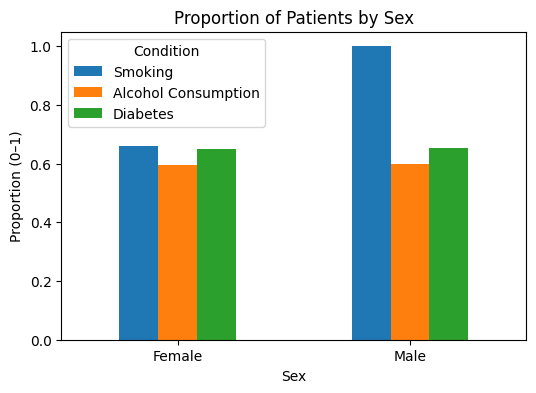

In [292]:
proportions.plot(kind='bar', figsize=(6,4
                                    ))

plt.title("Proportion of Patients by Sex")
plt.ylabel("Proportion (0–1)")
plt.xlabel("Sex")
plt.legend(title="Condition")
plt.xticks(rotation=0)
plt.show()

In [293]:
# interactive graph between Age and cholesterol in mg/dl

%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [295]:
import plotly.express as px

fig = px.scatter(
    data,
    x="Age",
    y="Cholesterol",
    color="Heart Attack Risk",   # <- valid column
    title="Influence Age and Cholesterol"
)
fig.show()
